In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

import numpy as np
import pymc3 as pm

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def expectedRevenue(P):
    return 100*P[:,0] + 50*P[:,1] + 25*P[:,2] + 0*P[:,3]

In [3]:
nA = 1500
A_100 = 20
A_50 = 68
A_25 = 102
A_0  = nA - (A_100 + A_50 + A_25)
observationsA = np.array([A_100, A_50, A_25, A_0])


nB = 2000
B_100 = 45
B_50 = 65
B_25 = 200
B_0  = nB - (B_100 + B_50 + B_25)
observationsB = np.array([B_100, B_50, B_25, B_0])

In [4]:
priorParameters = np.array([1,1,1,1])

posteriorSamplesA = np.random.dirichlet(priorParameters + 
                                          observationsA, size=10000)
posteriorSamplesB = np.random.dirichlet(priorParameters + 
                                          observationsB, size=10000)

posteriorExpectedRevenueA = expectedRevenue(posteriorSamplesA)
posteriorExpectedRevenueB = expectedRevenue(posteriorSamplesB)

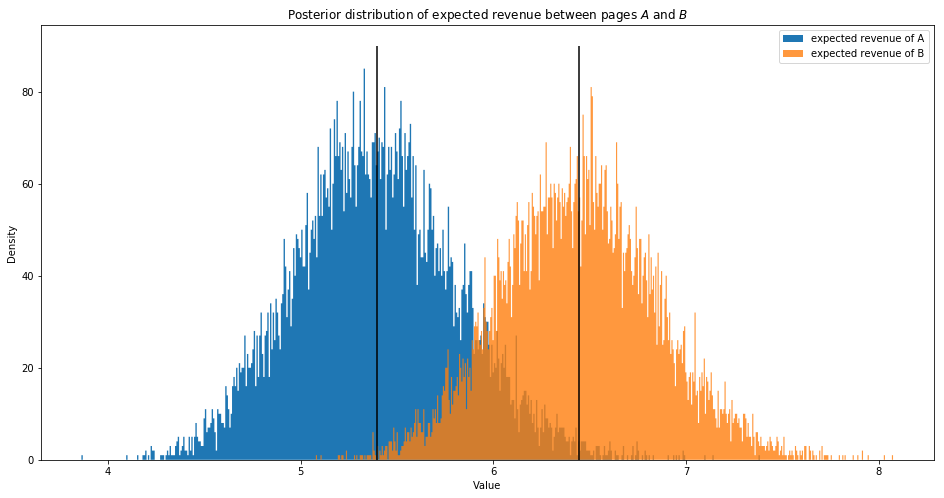

In [5]:
figsize(16, 8)

plt.hist(posteriorExpectedRevenueA, histtype='stepfilled', 
         label='expected revenue of A', bins=500)
plt.hist(posteriorExpectedRevenueB, histtype='stepfilled',
         label='expected revenue of B', bins=500, alpha=0.8)
plt.vlines(np.mean(posteriorExpectedRevenueA) , 0, 90)
plt.vlines(np.mean(posteriorExpectedRevenueB) , 0, 90)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution of expected revenue\
 between pages $A$ and $B$")
plt.legend();

In [6]:
p = (posteriorExpectedRevenueB > posteriorExpectedRevenueA).mean()
print("Probability that page B has a higher revenue than page A: %.3f"%p) 

Probability that page B has a higher revenue than page A: 0.964


In [7]:
posteriorDiff = posteriorExpectedRevenueB - posteriorExpectedRevenueA

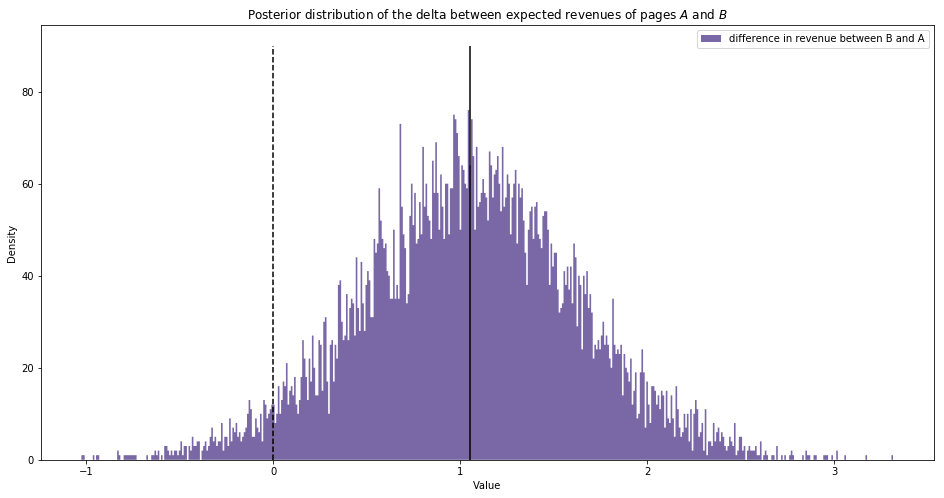

In [8]:
figsize(16, 8)

plt.hist(posteriorDiff, histtype='stepfilled', color='#7A68A6', 
         label='difference in revenue between B and A', bins=500)
plt.vlines(0, 0, 90, linestyles='--')
plt.vlines(np.mean(posteriorDiff) , 0, 90)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution of the delta between expected\
 revenues of pages $A$ and $B$")
plt.legend();

In [9]:
# Mean difference in expected revenues per-user
# Higherst Probability Density Interval, alpha = .05

print("Mean difference in expected revenues per-user of B over A: %s" \
      %np.mean(posteriorDiff))
print("\n")
HPD = list(pm.stats.hpd(posteriorDiff, alpha=0.05))
print("Highest Probability Density Interval of Posterior distribution " + 
"of the delta" + "\n" + "between expected revenues of B over A: %s" %HPD) 
print("\n")

Mean difference in expected revenues per-user of B over A: 1.050124255116378


Highest Probability Density Interval of Posterior distribution of the delta
between expected revenues of B over A: [-0.13790956536246934, 2.161076243887666]




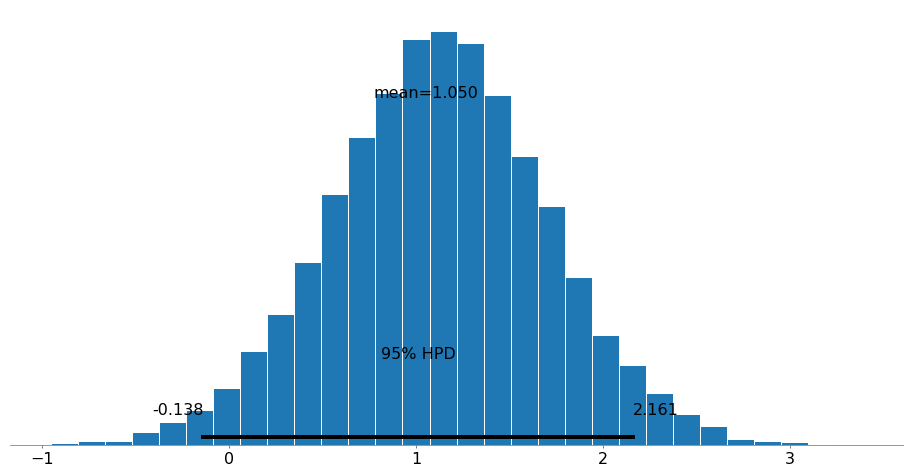

In [10]:
pm.plots.plot_posterior(trace=posteriorDiff, figsize=(16, 8));